In [22]:
# import the nexessary libraries
from PIL import Image
from os import listdir
from keras.models import load_model
import numpy as np
from numpy import asarray,expand_dims
from keras_facenet import FaceNet
import pickle
import cv2
import os
import re
from mtcnn import MTCNN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report

In [23]:
# same as training 
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
model_face = FaceNet()
mtcnn = MTCNN()

In [24]:
# load the database from data_processed.pkl file
myfile = open("data_processed.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [25]:
# add the list of manually labelled images (102 images)
names=['person_3','unknown','person_20','person_3','person_8','person_8','unknown','unknown','person_22','person_19'
,'person_17','person_17','person_14','person_15','unknown','person_5','person_9','unknown','person_9','person_7'
,'person_5','person_11','person_1','unknown','person_11','person_18','person_1','person_12','person_21','person_8'
,'unknown','person_8','person_8','person_8','person_1','person_19','person_8','person_8','unknown','person_23'
,'person_1','person_3','person_1','person_1','person_3','person_1','person_20','person_8','person_3','person_2'
,'person_22','person_8','person_10','person_10','person_10','person_2','person_23','person_2','person_2','person_21'
,'person_2','person_9','person_9','person_18','person_18','person_21','person_21','person_18','person_9','person_21'
,'person_9','person_5','person_22','person_22','person_22','person_11','person_23','person_22','person_23','person_2'
,'person_22','person_21','person_19','person_9','person_5','person_5','person_5','person_12','person_11','person_11'
,'person_23','person_1','person_8','person_12','person_2','person_22','person_14','person_17','person_15','person_5'
,'person_9','person_7']


In [26]:
# Convert the list to a set to remove duplicates
unique_entries = list(set(names))

# Now, 'unique_entries' will contain the distinct entries
print(unique_entries)

['person_10', 'person_5', 'person_18', 'person_7', 'person_15', 'person_12', 'person_22', 'person_19', 'person_14', 'person_20', 'person_8', 'person_21', 'person_3', 'unknown', 'person_9', 'person_11', 'person_23', 'person_2', 'person_17', 'person_1']


In [27]:
folder = 'testing_images/'
file_list = os.listdir(folder)

# intialise empty list for storing predicted names
predicted=[]

# Define a custom sorting function to extract the numeric part of the filename
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    if match:
        return int(match.group())
    return float('inf')  # If there are no numbers in the filename, treat it as infinity

# iterate through the sorted files as as training 
file_list_new = sorted(file_list, key=extract_number)
for filename in file_list_new:
    path = os.path.join(folder, filename)
    gbr1 = cv2.imread(folder + filename)
    
    harr = HaarCascade.detectMultiScale(gbr1,1.1,4)
    faces_mtcnn = mtcnn.detect_faces(gbr1)
    if len(harr)>0:
        x1, y1, width, height = harr[0] 
    elif len(faces_mtcnn) > 0:
        x1, y1, width, height = faces_mtcnn[0]['box']
    else:
        x1, y1, width, height = 1, 1, 10, 10
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Image.fromarray(gbr)  # Convert from OpenCV to PIL
    gbr_array = asarray(gbr)

    face = gbr_array[y1:y2, x1:x2]

    face = Image.fromarray(face)
    face = face.resize((160, 160))
    face = asarray(face)
    
    # compute the embeddings similar to the training
    face = expand_dims(face, axis=0)
    signature = model_face.embeddings(face)
    
    # define a min distance for the embeddings to match in the vector space
    min_dist=100
    # intialize empty identity
    identity=' '

    # find the embedding which matches the most to our testing photo and set the identity accordingly
    for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
            min_dist = dist
            identity = key
    # uncomment the following lines to see the testing one by one
    # cv2.namedWindow("output", cv2.WINDOW_NORMAL)       
    # cv2.resizeWindow("output", gbr1.shape[0],gbr1.shape[1]) 
    # cv2.putText(gbr1,identity, (100,100),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
    # cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)
    # cv2.imshow("output",gbr1)
    # cv2.waitKey(0)
    
    print(identity)
    # add the name of the person in the list
    predicted.append(identity)
        
# cv2.destroyAllWindows()
print(predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
person_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16m

In [28]:
print(len(names))

102


In [29]:
print(len(predicted))

102


In [30]:
# evaluate the model based on classification report, accuracy and confusion matrix
accuracy = accuracy_score(names, predicted)
print("Accuracy:", accuracy)

print(classification_report(names,predicted, target_names=['person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7',
'person_8','person_9', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16', 'person_17', 'person_18', 'unknown',
'person_19', 'person_20']))

Accuracy: 0.9117647058823529
              precision    recall  f1-score   support

    person_1       1.00      1.00      1.00         8
    person_2       1.00      1.00      1.00         3
    person_3       1.00      1.00      1.00         5
    person_4       1.00      1.00      1.00         3
    person_5       1.00      0.50      0.67         2
    person_6       1.00      1.00      1.00         2
    person_7       1.00      1.00      1.00         3
    person_8       1.00      1.00      1.00         4
    person_9       1.00      1.00      1.00         3
   person_10       1.00      0.86      0.92         7
   person_11       1.00      0.50      0.67         2
   person_12       1.00      1.00      1.00         6
   person_13       1.00      1.00      1.00         8
   person_14       1.00      1.00      1.00         5
   person_15       1.00      1.00      1.00         5
   person_16       0.00      0.00      0.00         0
   person_17       1.00      1.00      1.00         

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

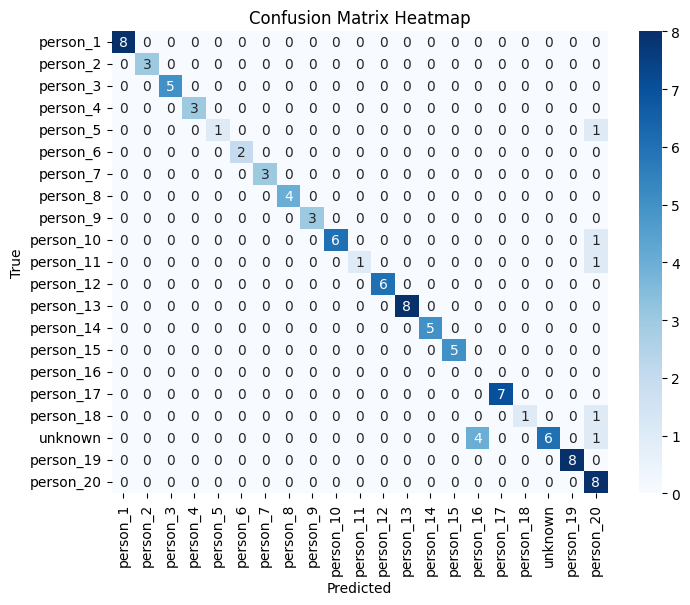

In [31]:
# heat map for the confusion matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(names, predicted)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7',
'person_8','person_9', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16', 'person_17', 'person_18', 'unknown',
'person_19', 'person_20'], yticklabels=['person_1', 'person_2', 'person_3', 'person_4', 'person_5', 'person_6', 'person_7',
'person_8','person_9', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15', 'person_16', 'person_17', 'person_18', 'unknown',
'person_19', 'person_20'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()